In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('./listings.csv')
calendar = pd.read_csv('./calendar.csv')

<h2>Question 1: How have price and availability changed over time, and what time of year has the highest price?</h2>

First I will take a look at the calendar data.

In [2]:
print(calendar.dtypes)
calendar.head()

listing_id     int64
date          object
available     object
price         object
dtype: object


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


Because I want to know how the price is changing over time, I will drop rows which do not display price. I could also impute the price, but because I will not be building a model for this question it is not necessary. Also, I want to graph the price, and I can see the price is dtype object, so I will convert to integer.

In [3]:
cdf = calendar.copy()
cdf.dropna(subset=['price'],inplace=True)
cdf['price'] = cdf['price'].map(lambda p: int(p[1:-3].replace(",", "")))
cdf.head()

,listing_id,date,available,price
365,3075044,2017-08-22,t,65
366,3075044,2017-08-21,t,65
367,3075044,2017-08-20,t,65
368,3075044,2017-08-19,t,75
369,3075044,2017-08-18,t,75


Also need to convert the date to a datetime type for pretty graphing.

In [4]:
cdf['date'] = pd.to_datetime(cdf['date'])
print(cdf.dtypes)

listing_id             int64
date          datetime64[ns]
available             object
price                  int64
dtype: object


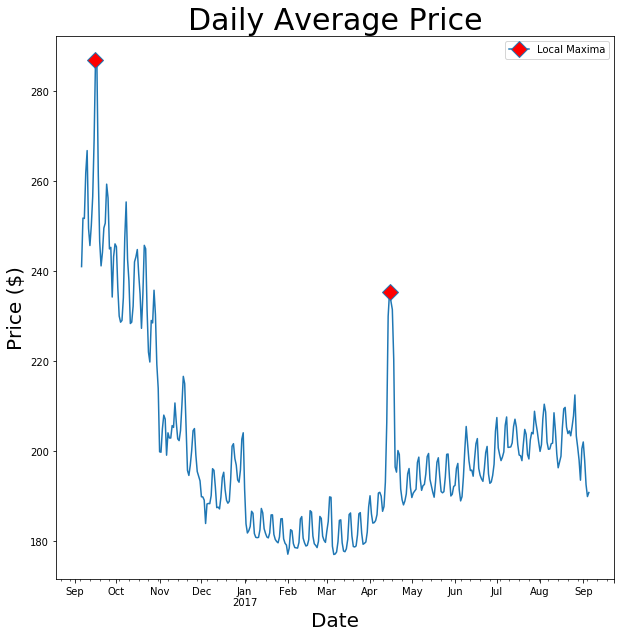

In [5]:
# Group data by date and take the mean of the price by date for graph
mean_price = cdf.groupby(['date'])['price'].mean()
mean_price.plot(figsize=(10,10), markevery=[10,221], marker="D", markersize=12, markerfacecolor='red',);
plt.title('Daily Average Price',fontsize=30)
plt.ylabel('Price ($)',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.legend(['Local Maxima']);

From these results, we can see the Airbnb prices have come down a lot over the past year on average, however there was a large spike in mid April of 2017. 

In [6]:
# use index 116 as dividing point because it is last day of 2016
print(mean_price.index[116])

print("Mean price for 2016 data: " + str(mean_price[0:116].mean()))
print("Mean price for September 16th: " + str(mean_price[10].mean()))
print("Mean price for 2017 data: " + str(mean_price[117:].mean()))
print("Mean price for April 15th: " + str(mean_price[221].mean()))

2016-12-31 00:00:00
Mean price for 2016 data: 219.53959385064348
Mean price for September 16th: 286.9219765929779
Mean price for 2017 data: 192.55892696376452
Mean price for April 15th: 235.50161812297733


So comparing the last four months of 2016 to the first 8 months of 2017 we can see the price has on average reduced by almost $40.
Another interesting feature of the data is the large spikes in mean price mid-September of 2016 and mid-April of 2017. Let's take a look
at the availability feature to see if there is a corresponding trend.

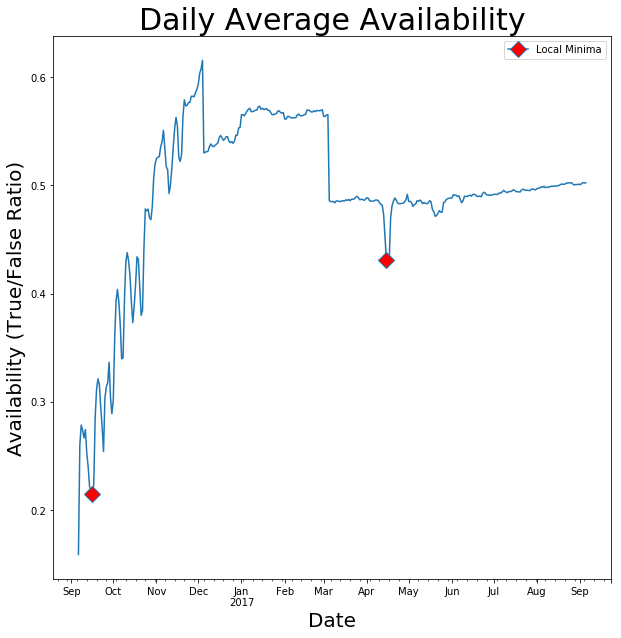

In [7]:
c2 = calendar.copy()
c2['available'] = c2['available'].replace("f",0)
c2['available'] = c2['available'].replace("t",1)
c2['date'] = pd.to_datetime(c2['date'])
mean_avail = c2.groupby(['date'])['available'].mean()
mean_avail.plot(figsize=(10,10), markevery=[10,221], marker="D", markersize=12, markerfacecolor='red');
plt.title('Daily Average Availability',fontsize=30)
plt.ylabel('Availability (True/False Ratio)',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.legend(['Local Minima']);

What we can see from this graph is that the price and availability are nearly inverses of each other. Beginning early March 2017, Airbnb was able to stabilize and increase the availability to around 0.5 ratio. Probably overall low availability contributed to the higher prices in 2016, and the spike in price mid-April makes sense as well because there was a drop in availability during this time.

The Boston marathon was on April 17th 2017, so this probably accounts for the increased prices and reduced availablity around that time. With only one year of data, we can't make any conclusive statements, but it seems around the time of the Boston marathon the prices will be the highest and the availability will be the lowest.

<h2>Question 2: What are the differences between Boston neighborhoods in terms of price, availability, and review ratings?</h2>

The listings dataset will help to answer these questions. Firstly I need to convert the price in integers, as I did with the calendar data.

In [8]:
ldf = listings.copy()
ldf['price'] = ldf['price'].map(lambda p: int(p[1:-3].replace(",", "")))

Now I can group the data by neighborhood and use the pandas describe function to generative descriptive statistics, which gives the shape of the data distribution.

In [9]:
ldf.groupby(['neighbourhood_cleansed'])['price'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Mattapan,24.0,75.125000,33.171901,40.0,50.00,67.0,83.00,169.0
Hyde Park,31.0,86.548387,66.468458,31.0,50.00,58.0,86.50,269.0
Dorchester,269.0,91.639405,56.984681,25.0,59.00,72.0,105.00,395.0
Roslindale,56.0,98.428571,54.793449,40.0,60.00,76.5,116.25,285.0
West Roxbury,46.0,107.108696,67.772570,45.0,65.00,85.0,119.75,349.0
Allston,260.0,112.307692,79.980147,11.0,60.00,85.0,135.75,550.0
Brighton,185.0,118.767568,98.491254,29.0,65.00,90.0,140.00,999.0
East Boston,150.0,119.153333,66.080969,30.0,72.00,99.0,143.00,359.0
Mission Hill,124.0,121.967742,103.742641,20.0,65.00,89.5,160.00,872.0


While this is useful, it is often easier to summarize such information in a box plot for comparative purposes. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2).The position of the whiskers is set by default to 1.5 * the interquartile range. The diamonds represent outliers. 

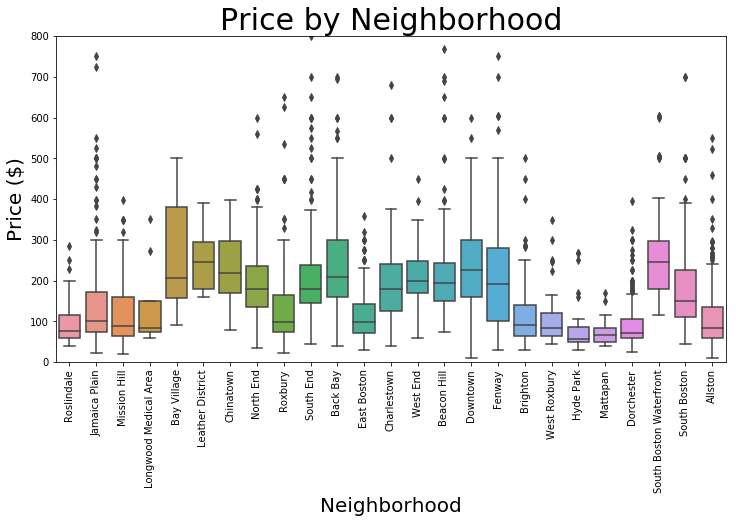

In [10]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'price',  data = ldf)
xt = plt.ylim(0, 800)
xt = plt.xticks(rotation=90)
plt.title('Price by Neighborhood',fontsize=30)
plt.ylabel('Price ($)',fontsize=20)
plt.xlabel('Neighborhood',fontsize=20);

From the plot, it is easier to see that even though the Leather District has the highest mean, Bay Village, Back Bay, Downtown, and Fenway more have the biggest skew towards higher prices, as we can see from the whiskers of the box plot. Note that I cut-off the outliers above 800 to make the height of the box plot whiskers more visible. Another notable fact is that almost every neighborhood has a number of outliers with higher prices.

Next, I will repeat the same steps with the availability_365 column.

In [11]:
ldf.groupby(['neighbourhood_cleansed'])['availability_365'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Mission Hill,124.0,130.145161,137.563803,0.0,0.00,55.0,283.00,365.0
Allston,260.0,131.896154,145.248026,0.0,0.00,64.0,280.25,365.0
Leather District,5.0,145.000000,198.557297,0.0,0.00,0.0,360.00,365.0
Fenway,290.0,149.527586,126.876616,0.0,20.75,148.0,248.00,365.0
South Boston Waterfront,83.0,161.168675,133.663285,0.0,29.50,117.0,305.50,365.0
Beacon Hill,194.0,163.675258,142.163894,0.0,6.25,141.5,308.75,365.0
North End,143.0,164.902098,142.399028,0.0,0.00,196.0,307.50,365.0
South End,326.0,165.861963,141.229380,0.0,16.25,142.5,314.75,365.0
Brighton,185.0,168.643243,147.387512,0.0,0.00,158.0,319.00,365.0


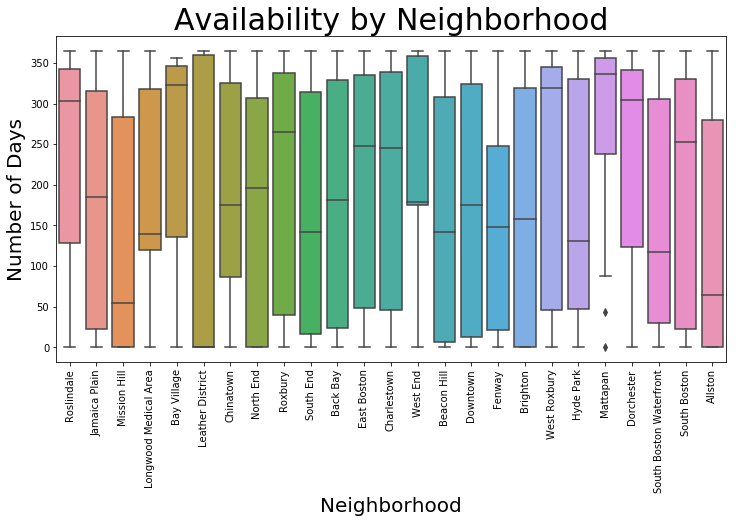

In [12]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'availability_365',  data = ldf)
xt = plt.xticks(rotation=90)
plt.title('Availability by Neighborhood',fontsize=30)
plt.ylabel('Number of Days',fontsize=20)
plt.xlabel('Neighborhood',fontsize=20);

Here we can see that IQR is a much wider spread. For many neighborhoods, such as the Leather District, the IQR spans almost the entire range of the data set. Please note that low availability may not mean that the property itself is rented, it is possible the owner is only renting their space occasionally.

Every neighborhood has some properties with almost year-long availability and some properties with almost no availability. Mean availability is probably the best point of comparison. Many higher-priced neighborhoods, such as the Leather District and South Boston Waterfront, have lower average availability. Leather District actually has a mean of zero. However, there are also some more reasonably priced neighborhoods with lower average availability, such as Mission Hill, Hyde Park, and Allston.

In [13]:
ldf.groupby(['neighbourhood_cleansed'])['review_scores_rating'].describe().sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
neighbourhood_cleansed,,,,,,,,
Mission Hill,82.0,87.695122,13.800777,20.0,83.25,92.0,96.00,100.0
Dorchester,225.0,89.280000,11.957395,20.0,87.00,93.0,97.00,100.0
Fenway,187.0,89.417112,11.880106,40.0,83.00,93.0,100.00,100.0
Roxbury,117.0,89.803419,8.980092,58.0,85.00,91.0,97.00,100.0
Allston,182.0,90.164835,13.304561,20.0,89.25,94.0,100.00,100.0
East Boston,136.0,90.272059,8.854768,47.0,86.00,92.0,97.00,100.0
West End,27.0,90.333333,9.503036,60.0,87.50,93.0,97.00,100.0
Brighton,133.0,90.864662,12.600975,20.0,89.00,94.0,98.00,100.0
Mattapan,18.0,91.000000,6.650962,80.0,87.00,90.5,95.75,100.0


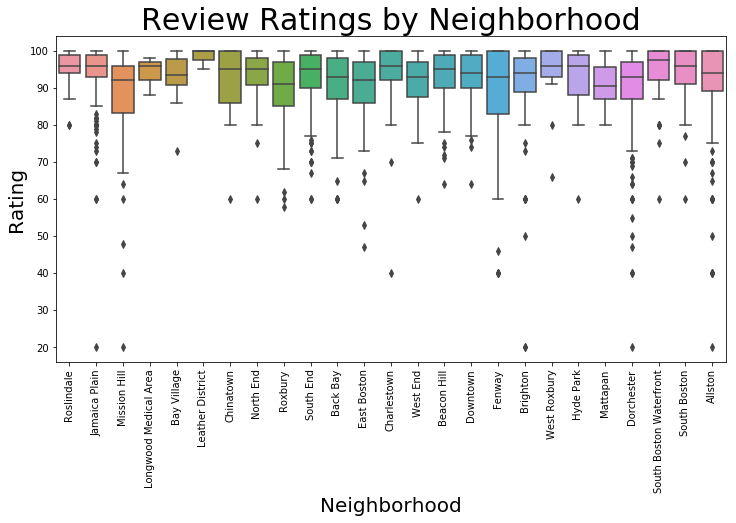

In [14]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'neighbourhood_cleansed', y = 'review_scores_rating',  data = ldf)
xt = plt.xticks(rotation=90)
plt.title('Review Ratings by Neighborhood',fontsize=30)
plt.ylabel('Rating',fontsize=20)
plt.xlabel('Neighborhood',fontsize=20);

For review scores, we can see that there is very little spread in the data. It seems people who use Airbnb are quite nice and prefer to leave high reviews in the 90s. However, we can also see some long tails in the distribution around the 65 level. Mission Hill, Roxbury, and Fenway have the worst long tails with lower reviews. In addition, there are a number of outlier poor reviews for almost every neighborhood. 

<h2>Question 3: What features in the data have the biggest impact on price?</h2>

I will determine which features have the greatest impact on price by creating a simple linear regression model and using the trained coefficients of the model to interpret their respective impact.

I will begin by once again by converting the price to integers. Also, I drop any rows that do not have a price because this is the feature we are trying to predict.

In [15]:
dfmodel = listings.copy()
dfmodel['price'] = dfmodel['price'].map(lambda p: int(p[1:-3].replace(",", "")))
dfmodel.dropna(subset=['price']);

Firstly, I will drop any columns that are irrelevant, redundant, have too few rows, or give the model the same information that it is trying to predict. 

Then I create a heatmap to see which non-categorical features have the strongest correlation with price.

In [16]:
dfmodel = dfmodel.drop(['id','listing_url','scrape_id','last_scraped','name','description','experiences_offered','picture_url',
             'host_id','host_name','host_since','host_location','host_thumbnail_url','host_picture_url','street','neighbourhood',
             'neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country',
             'latitude','longitude','is_location_exact','square_feet','weekly_price','monthly_price','calendar_updated','has_availability',
             'calendar_last_scraped','first_review','last_review','requires_license','license','jurisdiction_names','host_listings_count'],axis=1)


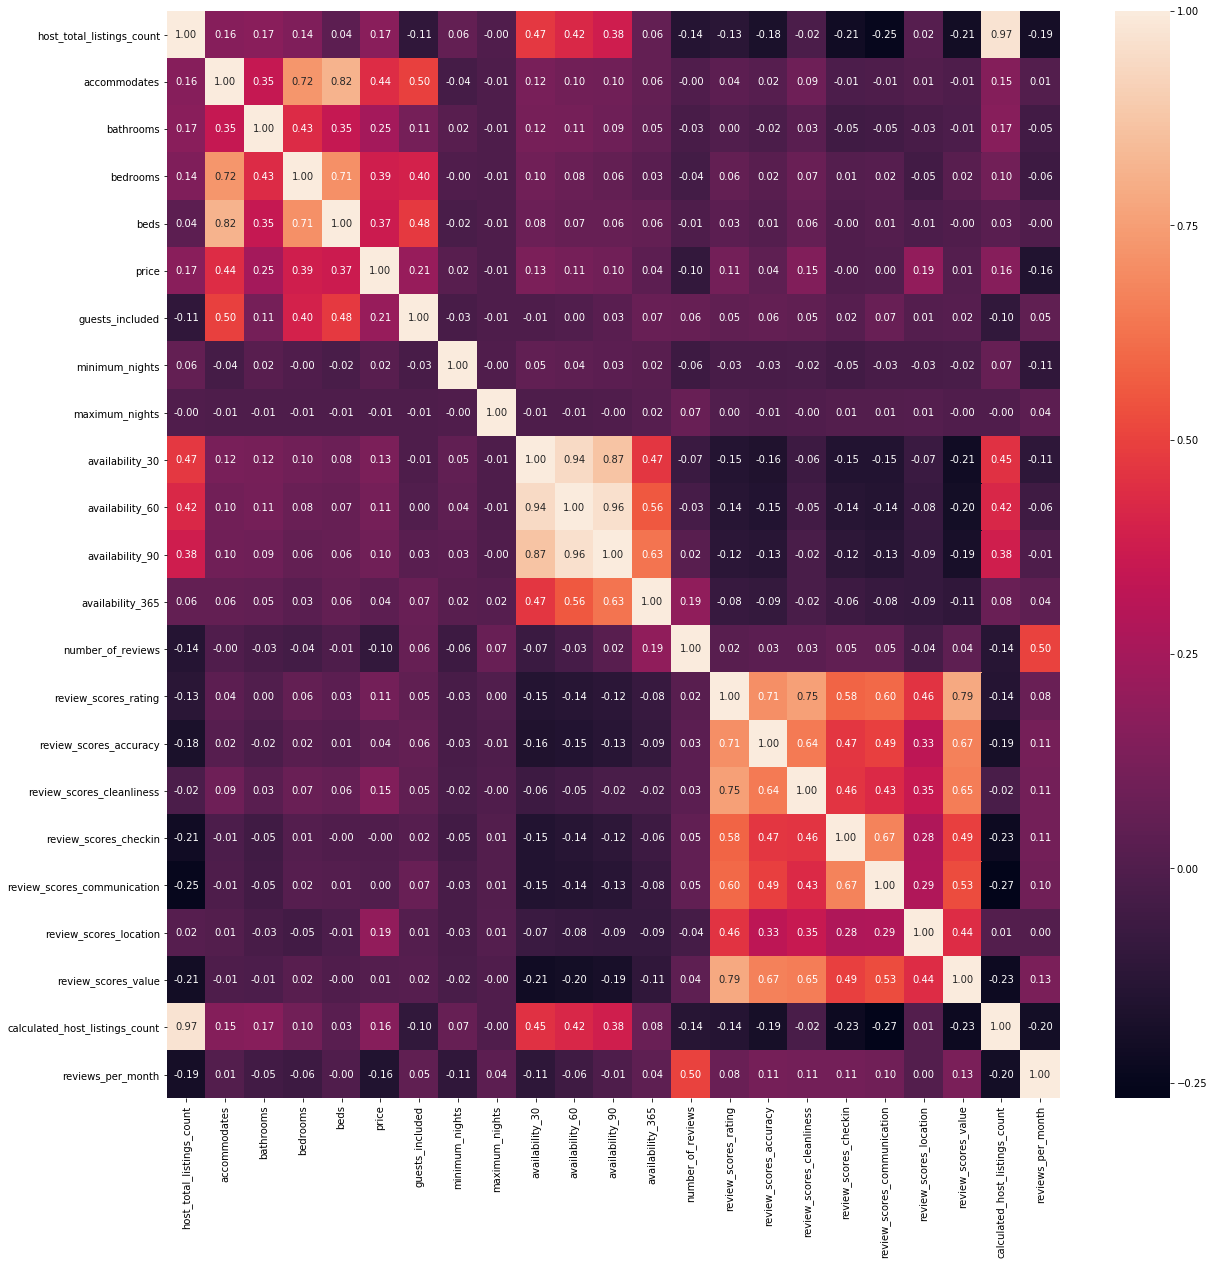

In [17]:
fig, ax = plt.subplots(figsize=(20,20))    
sns.heatmap(dfmodel.corr(), annot=True, fmt=".2f",ax=ax);

Now I can split the data into numeric data and categorical data, because each will be handled differently. And then split the numeric data into a target variable, price, and the training features. I got a negative r-squared value when I used all values stored in modelnum dataframe, so I use the seaborn figure to just select the most correlated variables. 

I use a fill_mean lambda function to impute the values for missing data. This is required for the sklearn model to be trained, and yields better results than dropping rows with missing data.

In [18]:
model_cat = dfmodel.select_dtypes(include='object')
model_num = dfmodel.select_dtypes(exclude='object')
y = model_num['price']
X = model_num[['accommodates','host_total_listings_count','number_of_reviews','review_scores_rating','guests_included',
              'bathrooms','bedrooms','beds','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_value']]
fill_mean = lambda col: col.fillna(col.mean())
X = X.apply(fill_mean, axis=0)

In [19]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.18495786651013746 on 1076 values.'

0.1849 is okay for a first attempt, but I was expecting better. From the seaborn correlation figure I can see that some features like beds and accommodates are highly related to price. So I will try retraining the model again, but this time drop all the outliers. This following one liner will drop all rows which have a price more than 3 times the absolute value of the standard deviation. 

In [20]:
dfmodel = dfmodel[np.abs(dfmodel.price-dfmodel.price.mean()) <= (3*dfmodel.price.std())]

In [21]:
model_cat = dfmodel.select_dtypes(include='object')
model_num = dfmodel.select_dtypes(exclude='object')
y = model_num['price']
X = model_num[['accommodates','host_total_listings_count','number_of_reviews','review_scores_rating','guests_included',
              'bathrooms','bedrooms','beds','review_scores_accuracy','review_scores_cleanliness',
              'review_scores_checkin','review_scores_value']]
fill_mean = lambda col: col.fillna(col.mean())
X = X.apply(fill_mean, axis=0)

In [22]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.4082506323040699 on 1066 values.'

Great, that is much better! Now I will try to add the amenities features to the training features. This took quite a long time to figure out how to do. In the end, Aleksey Bilogur's Modeling Prices kernel on Kaggle helped me find the solution. The amenities feature was combined together in strings that need to be parsed.

In [23]:
a = listings['amenities'].map(
    lambda amns: "|".join([amn.replace("}", "").replace("{", "").replace('"', "")\
                           for amn in amns.split(",")])
)
possible_vals = np.unique(np.concatenate(a.map(lambda amns: amns.split("|"))))[1:]

In [24]:
amenity = np.array([model_cat['amenities'].map(lambda amns: amn in amns) for amn in possible_vals])
amenity = amenity.T
amenitydf = pd.DataFrame(data=amenity, columns=possible_vals)
X = pd.concat([X.reset_index(drop=True), amenitydf.reset_index(drop=True)],axis=1)

In [25]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model with amenities added was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model with amenities added was 0.5156275009712186 on 1066 values.'

Even better! Now I will one hot encode the categorical features to add them to the training set. One hot encoding is necessary to learn on categorical data. 

In [26]:
df = model_cat[['neighbourhood_cleansed','room_type', 'bed_type','host_is_superhost','require_guest_phone_verification','host_identity_verified']]
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
x = pd.concat([df.reset_index(drop=True),X.reset_index(drop=True)],axis=1)
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)


In [27]:
"The r-squared score for the model using additional categorical variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using additional categorical variables was 0.632361740510893 on 1066 values.'

Okay, now with the model trained, I want to take a look at the coefficient weights for interpretation and graphing purposes.

In [28]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['columns'] = X_train.columns
    coefs_df['coefficient_influence'] = lm_model.coef_
    coefs_df['absolute_value_coefficients'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('absolute_value_coefficients', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,columns,coefficient_influence,absolute_value_coefficients
12,neighbourhood_cleansed_Leather District,110.073569,110.073569
1,neighbourhood_cleansed_Bay Village,93.239834,93.239834
0,neighbourhood_cleansed_Back Bay,76.914336,76.914336
20,neighbourhood_cleansed_South Boston Waterfront,75.142890,75.142890
7,neighbourhood_cleansed_Downtown,66.493630,66.493630
25,room_type_Shared room,-62.191919,62.191919
2,neighbourhood_cleansed_Beacon Hill,61.542595,61.542595
24,room_type_Private room,-49.728878,49.728878
31,require_guest_phone_verification_t,48.810164,48.810164
21,neighbourhood_cleansed_South End,44.296038,44.296038


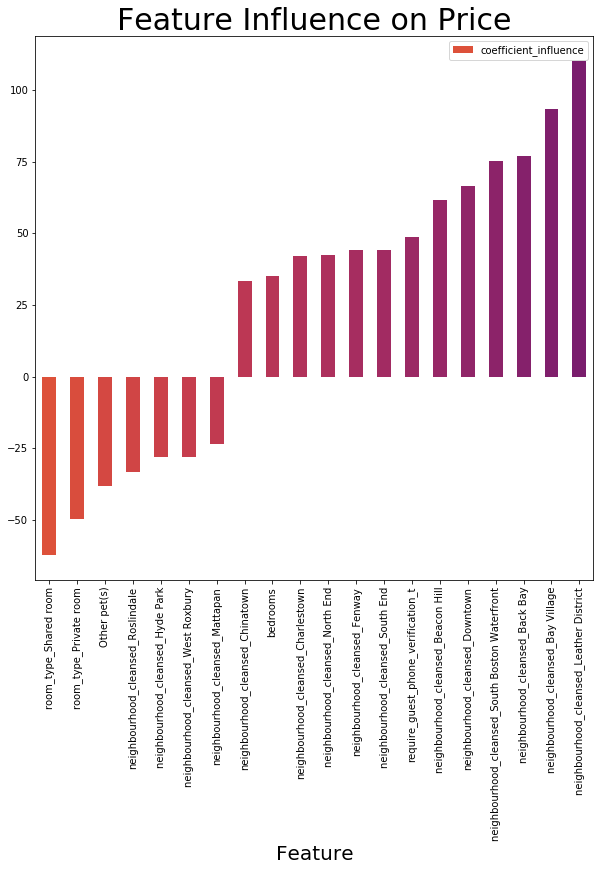

In [29]:
color = plt.cm.inferno_r(np.linspace(.4,.8, 30))
coef_df.head(20).sort_values('coefficient_influence').plot(kind = 'bar', x= 'columns', y='coefficient_influence',figsize=(10,10),color=color)
plt.title('Feature Influence on Price',fontsize=30)
plt.xlabel('Feature',fontsize=20);

With these coefficient weights, I now have the answer to the question. The top five features are all neighborhoods: Leather District, Bay Village, Back Bay, South Boston Waterfront, and Downtown. Other interesting features include the room type of shared room as well as private room, both of which have a negative impact on price. Also, requiring phone verification is an indicator of a higher price, which is probably an indicator of professional renters using Airbnb.